## Count Vectorization

Count Vectorization is a method used to convert text data into numerical vectors by counting the frequency of each word in a document. Unlike TF-IDF Vectorization, which weighs words based on their importance and frequency, Count Vectorization simply tallies the number of occurrences of each word.

### How It Works:

1. **Tokenization**: Text is split into individual words or tokens.
2. **Counting**: The number of times each unique word appears in the document is counted.
3. **Vector Representation**: Each document is represented as a vector, where each element corresponds to the count of a specific word from the vocabulary.

### Key Points:

- **Bag of Words Approach**: This method treats each document as a "bag" of words, ignoring the order in which words appear.
- **Loss of Context**: While simple and effective, Count Vectorization loses the sequence and context of words within the text.

### Example:

If we have a corpus with the following sentences:
1. "The cat sat on the mat."
2. "The dog sat on the log."

The Count Vectorization might produce the following vectors:
- Sentence 1: [2, 1, 1, 1, 1, 1] (for 'The', 'cat', 'sat', 'on', 'the', 'mat')
- Sentence 2: [2, 1, 1, 1, 1, 1] (for 'The', 'dog', 'sat', 'on', 'the', 'log')

In these vectors, each element represents the count of a unique word in the corpus. For instance, the count of the word "The" is 2 in both sentences, but other words vary based on their frequency in each sentence.

### Considerations:

- **High Dimensionality**: The number of features (words) can become very large, leading to high-dimensional vectors.
- **Feature Engineering**: Additional techniques like removing stop words or applying n-grams can help in improving the model performance.

Count Vectorization is straightforward and often used as a baseline method for text processing in machine learning models. However, it is often complemented with other techniques to capture more nuanced aspects of the text.


In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
import pickle
import sys
import os
# NLP libraries
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# modeling libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from collections import Counter
from sklearn import metrics, utils, model_selection, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

**Preprocessing Text Data**
The original data from `twitter_data.csv` was cleaned using RegEx in the `data_cleaning.ipynb` notebook.

Cleaning Steps:

*   Reassigning labels
*   Lowercasing tweet text
*   Removing hashtags, mentions, quotes and punctuation from tweet text
*   Checking for missing values

In [2]:
# loading in clean_df
clean_df = pd.read_pickle('./pickle/clean_df.pkl')

In [3]:
# previewing data
clean_df.head()

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweet
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,3,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...
2,3,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to...
3,3,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny
4,6,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or...


From here, we'll be focusing on the clean_tweet column and the target variable, label.

#   **Tokenizing & Removing Stop Words**
When working with text data, one of the first steps is to remove stop words from the corpus. Although text would be gramatically incorrect without these stop words, they provide little value to models and typically hinder performace.

We can use NLTK's built-in library of stop words to remove them in a tokenizing function.

In [4]:
# assigning variables to essential columns
data = clean_df['clean_tweet']
target = clean_df['label']

In [5]:
# setting up stop words
# Define your custom list of stop words
custom_stop_words = ['s', 'y', 'itself', 'this', 'to', 'after', 'yourselves', 'do', 'further', 'these', 'own', 'ours', 'yours', 'when', 'aren', 'shan', "mightn't", 'doesn', 'isn', 'have', 'because', 'hasn', 'him', 'hers', 'such', 'up', 'through', 'we', 'but', "haven't", 'am', 'between', "don't", 'had', 'just', 'being', 'should', 'which', 'by', 't', 'for', 'then', 'why', 'is', 'here', 'they', 'over', "didn't", "won't", "aren't", "you've", "wouldn't", "that'll", "weren't", 'does', 'myself', 'that', 'ma', "needn't", 'or', 'its', 'don', 'only', 'into', 'so', 'few', 'now', 'ain', 'our', 'couldn', 'having', 've', 'it', 'been', 'both', 'whom', 'his', 'each', 'was', 'any', 'while', 'a', 'some', 'nor', 'herself', 'under', "you'd", 'haven', 'you', 'until', 'before', 'theirs', 'ourselves', 'are', 'be', 'o', 'me', 'he', 'there', 'once', 'at', 'can', 'out', 'weren', 'off', 'm', 'will', 'from', 'her', 'down', 'what', 'mustn', 'wasn', 'on', 'their', "mustn't", 'd', 'too', "wasn't", 'of', 'mightn', "you'll", 'needn', "shouldn't", "you're", 'where', 'were', 'hadn', 'how', 'your', 'those', 'himself', 'about', 'i', 'below', "doesn't", 'has', 'my', 'during', 'same', 'yourself', 'the', 'did', 'more', 'doing', 'above', 're', "it's", 'wouldn', 'all', 'most', 'other', 'and', 'against', 'an', "shan't", 'she', 'in', 'themselves', 'didn', "she's", 'very', "isn't", 'with', "hadn't", 'shouldn', 'if', 'than', 'them', "couldn't", 'as', "hasn't", 'll', 'again', 'who', 'no', 'not', 'won', "should've"]

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def process_tweet(text):
    """Tokenize text and remove stop words."""
    # Define the custom stop words
    custom_stop_words = set([
        's', 'y', 'itself', 'this', 'to', 'after', 'yourselves', 'do', 'further', 'these', 'own', 'ours', 
        'yours', 'when', 'aren', 'shan', "mightn't", 'doesn', 'isn', 'have', 'because', 'hasn', 'him', 
        'hers', 'such', 'up', 'through', 'we', 'but', "haven't", 'am', 'between', "don't", 'had', 'just', 
        'being', 'should', 'which', 'by', 't', 'for', 'then', 'why', 'is', 'here', 'they', 'over', "didn't", 
        "won't", "aren't", "you've", "wouldn't", "that'll", "weren't", 'does', 'myself', 'that', 'ma', 
        "needn't", 'or', 'its', 'don', 'only', 'into', 'so', 'few', 'now', 'ain', 'our', 'couldn', 
        'having', 've', 'it', 'been', 'both', 'whom', 'his', 'each', 'was', 'any', 'while', 'a', 'some', 
        'nor', 'herself', 'under', "you'd", 'haven', 'you', 'until', 'before', 'theirs', 'ourselves', 
        'are', 'be', 'o', 'me', 'he', 'there', 'once', 'at', 'can', 'out', 'weren', 'off', 'm', 'will', 
        'from', 'her', 'down', 'what', 'mustn', 'wasn', 'on', 'their', "mustn't", 'd', 'too', "wasn't", 
        'of', 'mightn', "you'll", 'needn', "shouldn't", "you're", 'where', 'were', 'hadn', 'how', 
        'your', 'those', 'himself', 'about', 'i', 'below', "doesn't", 'has', 'my', 'during', 'same', 
        'yourself', 'the', 'did', 'more', 'doing', 'above', 're', "it's", 'wouldn', 'all', 'most', 
        'other', 'and', 'against', 'an', "shan't", 'she', 'in', 'themselves', 'didn', "she's", 'very', 
        "isn't", 'with', "hadn't", 'shouldn', 'if', 'than', 'them', "couldn't", 'as', "hasn't", 'll', 
        'again', 'who', 'no', 'not', 'won', "should've"
    ])
    
    # Combine custom stop words with NLTK's stop words
    stop_words = set(stopwords.words('english')).union(custom_stop_words)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    
    return stopwords_removed


In [7]:
# applying the above function to our `clean_tweets`
processed_data = list(map(process_tweet, data))

In [8]:
# getting count of all unique words in the corpus
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

20277

We can see that the corpus has a vocabulary of 20,277 unique words. This is useful to know because that will be the amount of columns in the sparse matrix after TF-IDF Vectorization. But we'll get to that step later.

## **Top Words in Corpus**

In [9]:
# transforming `processed_data` into a readable list
flat_filtered = [item for sublist in processed_data for item in sublist]
# getting frequency distribution
clean_corpus_freqdist = FreqDist(flat_filtered)
# top 20 words in cleaned corpus
clean_corpus_freqdist.most_common(20)

[('bitch', 8227),
 ('bitches', 3083),
 ('like', 2766),
 ('hoes', 2368),
 ('pussy', 2099),
 ('im', 2061),
 ('hoe', 1906),
 ('dont', 1749),
 ('got', 1597),
 ('ass', 1570),
 ('get', 1428),
 ('fuck', 1411),
 ('u', 1280),
 ('shit', 1262),
 ('nigga', 1198),
 ('aint', 1158),
 ('trash', 1142),
 ('lol', 1074),
 ('know', 806),
 ('niggas', 791)]

These top words are mostly offensive terms, and some other slang words that the NLTK stop words removal function didn't pick up.

For a breakdown of the top words in each label, refer to EDA.ipynb 

## Lemmatization
This last method reduces each word into a linguistically valid lemma, or root word. It does this through linguistic mappings, using the WordNet lexical database.

In [10]:
# creating a list with all lemmatized outputs
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [11]:
X_lem = lemmatized_output
y_lem = target

Now `X_lem` and `y_lem` are contain cleaned text and the original labels, ready to be used for modeling.

## **Feature Engineering**
With Natural Language Processing, the purpose of feature engineering is to transform the tokenized text data into numerical vectors that the machine learning algorithm can "understand."

In this notebook, we'll be iterating through three different feature engineering techniques: **Count Vectorization**, **TF-IDF** Vectorization and **Doc2Vec**. Trying out these techniques could yield vastly different metrics on the same four baseline models.

## **Train-Test Split**
First, let's perform a train-test split of the dataset, where 20% is reserved as unseen testing data.

In [51]:
# initial TTS
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=15)

## TF-IDF Vectorization
First, we’ll be trying one of the most popular methods, TF-IDF Vectorization.

This is an acronym that stands for “Term Frequency — Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

*   **Term Frequency**: This summarizes how often a given word appears within a document.
*   **Inverse Document Frequency**: This down scales words that appear a lot across documents.


Without going into the math, TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across other documents.

In [52]:
# instantiating tf_idf vectorizer
tfidf = TfidfVectorizer(stop_words= custom_stop_words, ngram_range=(1,2))

In [53]:
# transforming tokenized data into sparse matrix format with 20K stored elements
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [54]:
# taking a quick look at the non zero elements
non_zero_cols = X_train_tfidf.nnz / float(X_train_tfidf.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))
percent_sparse = 1 - (non_zero_cols / float(X_train_tfidf.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 13.364420457984465
Percentage of columns containing ZERO: 0.9998720483637183


Here, we can see that 99.9% of the columns contain a zero, meaning that's a very sparse matrix with 20K columns. We know the amount of columns because it's the size of the total corpus vocabulary. Additionally, it seems that the average length of the individual tweets is 13 words.

# Count Vectorization



In [12]:
# fresh TTS
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=20)

In [13]:
# instantiating count vectorizer
count = CountVectorizer(stop_words=custom_stop_words)

In [14]:
# fitting to the train and test set
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)

In [78]:
## pickling X_train for future use
pickle_out = open("pickle/X_train_2.pkl","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

## **Linear SVM with Count Vectorization**

In [15]:
count_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced')

In [16]:
%%time 
# fit the training dataset on the classifier
count_SVM.fit(X_train_count, y_train)
# predict the labels on validation dataset
count_SVM_test_preds = count_SVM.predict(X_test_count)

CPU times: total: 9.41 s
Wall time: 19.9 s


In [17]:
# function to print all evaluation metrics
def evaluation(precision, recall, f1_score, f1_weighted):
    """prints out evaluation metrics for a model"""
    print('Testing Set Evaluation Metrics:')
    print('Precision: {:.4}'.format(precision))
    print('Recall: {:.4}'.format(recall))
    print('F1 Score: {:.4}'.format(f1_score))
    print('Weighted F1 Score: {:.4}'.format(f1_weighted))

In [18]:
count_SVM_precision = precision_score(y_test, count_SVM_test_preds)
count_SVM_recall = recall_score(y_test, count_SVM_test_preds)
count_SVM_f1_score = f1_score(y_test, count_SVM_test_preds)
count_SVM_f1_weighted = f1_score(y_test, count_SVM_test_preds, average='weighted')

# printing scores
evaluation(count_SVM_precision, count_SVM_recall, count_SVM_f1_score, count_SVM_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.9751
Recall: 0.9487
F1 Score: 0.9617
Weighted F1 Score: 0.9386


Unfortunately this model did not achieve a higher F1 than the TF-IDF version of the SVM model.

In [66]:
# creating dictionary with all metrics
metric_dict = {}
metric_dict['SVM - CountVectorizer'] = {'precision': count_SVM_precision, 'recall': count_SVM_recall, 'f1_score': count_SVM_f1_score, 'weighted_f1': count_SVM_f1_weighted, 'fit': count_SVM.fit(X_train_count, y_train)}

## **Logistic Regression with Count Vectorization**

In [67]:
# instantiate model
count_log_reg_baseline = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)

In [68]:
%%time
count_log_reg_baseline.fit(X_train_count, y_train)
count_log_reg_test_preds = count_log_reg_baseline.predict(X_test_count)

CPU times: total: 391 ms
Wall time: 403 ms


In [69]:
count_log_reg_precision = precision_score(y_test, count_log_reg_test_preds)
count_log_reg_recall = recall_score(y_test, count_log_reg_test_preds)
count_log_reg_f1_score = f1_score(y_test, count_log_reg_test_preds)
count_log_reg_f1_weighted = f1_score(y_test, count_log_reg_test_preds, average='weighted')


In [71]:
# printing scores
evaluation(count_log_reg_precision, count_log_reg_recall, count_log_reg_f1_score, count_log_reg_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.9882
Recall: 0.9363
F1 Score: 0.9616
Weighted F1 Score: 0.9404


Using Count Vectorization on the Logistic Regression baseline actually produced the highest F1

In [74]:
metric_dict['Log Reg - CountVectorizer'] = {'precision': count_log_reg_precision, 'recall': count_log_reg_recall, 'f1_score': count_log_reg_f1_score, 'weighted_f1': count_log_reg_f1_weighted, 'fit': count_log_reg_baseline.fit(X_train_count, y_train)}

In [75]:
# printing dict for testing set metrics
pd.DataFrame.from_dict(metric_dict, orient='index')

,precision,recall,f1_score,weighted_f1,fit
SVM - CountVectorizer,0.975106,0.948656,0.961699,0.938620,"SVC(class_weight='balanced', gamma='auto', ker..."
Baseline Log Reg - CountVectorizer,0.988241,0.936304,0.961572,0.940434,"LogisticRegression(class_weight='balanced', ra..."
Log Reg - CountVectorizer,0.988241,0.936304,0.961572,0.940434,"LogisticRegression(class_weight='balanced', ra..."


# **Final Model Analysis:**
Logisitic Regression with CountVectorizer
The best performing model is a Logistic Regression model using CountVectorizer for feature engineering. The hyperparameters were penality=l2 and class_weight='balanced'.

# **Pickling Final Model**
This final model will be pickled for future use. For instance, the interactive webapp.



In [76]:
pickle_out = open("./pickle/final_log_reg_count_model.pkl","wb")
pickle.dump(count_log_reg_baseline, pickle_out)
pickle_out.close()

In [19]:
pickle_out = open("./pickle/final_svm_count_model.pkl","wb")
pickle.dump(count_SVM, pickle_out)
pickle_out.close()

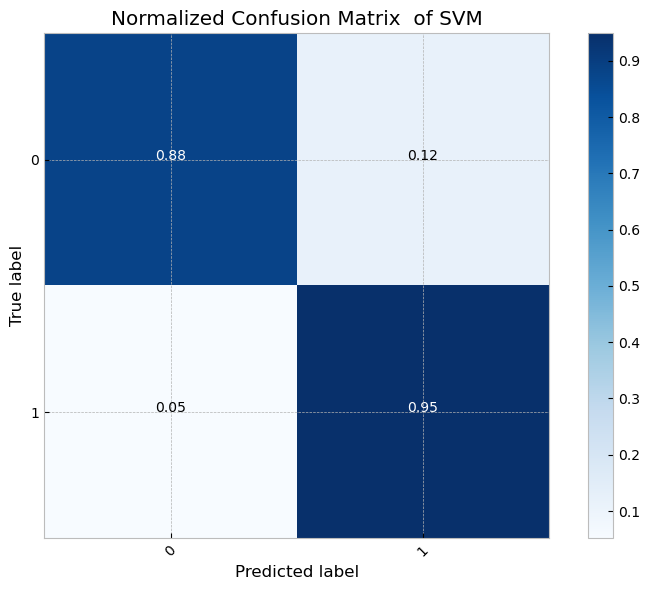

Normalized confusion matrix image saved as 'SVM_confusion_matrix_normalized.png'


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate confusion matrix manually
def calculate_confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

    for i, true_label in enumerate(unique_labels):
        for j, predicted_label in enumerate(unique_labels):
            matrix[i, j] = np.sum((y_true == true_label) & (y_pred == predicted_label))
    
    return matrix, unique_labels

# Generate confusion matrix manually
conf_matrix, labels = calculate_confusion_matrix(y_test, count_SVM_test_preds)

# Normalize confusion matrix
row_sums = conf_matrix.sum(axis=1, keepdims=True)
normalized_conf_matrix = conf_matrix / row_sums

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(normalized_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix  of SVM')
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Label each cell with the proportion
thresh = normalized_conf_matrix.max() / 2.
for i, j in np.ndindex(normalized_conf_matrix.shape):
    plt.text(j, i, format(normalized_conf_matrix[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if normalized_conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Save normalized confusion matrix as an image
plt.savefig('plots/SVM_confusion_matrix_normalized.png')

# Show plot
plt.show()

print("Normalized confusion matrix image saved as 'SVM_confusion_matrix_normalized.png'")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate confusion matrix manually
def calculate_confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

    for i, true_label in enumerate(unique_labels):
        for j, predicted_label in enumerate(unique_labels):
            matrix[i, j] = np.sum((y_true == true_label) & (y_pred == predicted_label))
    
    return matrix, unique_labels

# Generate confusion matrix manually
conf_matrix, labels = calculate_confusion_matrix(y_test, count_log_reg_test_preds)

# Normalize confusion matrix
row_sums = conf_matrix.sum(axis=1, keepdims=True)
normalized_conf_matrix = conf_matrix / row_sums

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(normalized_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix  of Logistic Regression')
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Label each cell with the proportion
thresh = normalized_conf_matrix.max() / 2.
for i, j in np.ndindex(normalized_conf_matrix.shape):
    plt.text(j, i, format(normalized_conf_matrix[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if normalized_conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Save normalized confusion matrix as an image
plt.savefig('plots/Log_reg_confusion_matrix_normalized.png')

# Show plot
plt.show()

print("Normalized confusion matrix image saved as 'Log_reg_confusion_matrix_normalized.png'")
